# Data Loading and Preprocessing

In [8]:
import pandas as pd
df = pd.read_csv('data/new_rnaseq_s1_s2.tsv', sep='\t')
df = pd.merge(df, pd.read_csv('data/new_file_to_case.tsv', sep='\t'), on='file_id', how='left')
df = pd.merge(df, pd.read_csv('data/clinical.tsv', sep='\t'), on='case_submitter_id', how='left')

In this section, we start by importing the pandas library, which will be crucial for data manipulation and analysis. Following this, we load three different datasets using the read_csv function and merge them into a single DataFrame. This consolidated DataFrame will form the basis of our data for subsequent analysis and model building.

# Feature Engineering and Model Training

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

arr =  ['vital_status',
 'ajcc_clinical_m',
 'ajcc_clinical_n',
 'ajcc_clinical_stage',
 'ajcc_clinical_t',
 'ajcc_pathologic_m',
 'ajcc_pathologic_n',
 'ajcc_pathologic_stage',
 'ajcc_pathologic_t',
 'ajcc_staging_system_edition',
 'icd_10_code',
 'morphology',
 'primary_diagnosis',
 'prior_malignancy',
 'prior_treatment',
 'site_of_resection_or_biopsy',
 'synchronous_malignancy',
 'tissue_or_organ_of_origin',
 'treatment_or_therapy',
 'treatment_type',
 'treatment_or_therapy_2',
 'treatment_type_2',
 'alcohol_history']

for i in arr:
    X = df.drop(columns=['file_id'] + list(pd.read_csv('data/clinical.tsv', sep='\t').columns)).apply(pd.to_numeric)
    y = df[i].map({value: index for index, value in enumerate(df[i].unique())})

    X = MinMaxScaler().fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    classifier = RandomForestClassifier()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(i, "Accuracy:", accuracy)

vital_status Accuracy: 0.5480769230769231
ajcc_clinical_m Accuracy: 0.9519230769230769
ajcc_clinical_n Accuracy: 0.46153846153846156
ajcc_clinical_stage Accuracy: 0.5192307692307693
ajcc_clinical_t Accuracy: 0.27884615384615385
ajcc_pathologic_m Accuracy: 0.5384615384615384
ajcc_pathologic_n Accuracy: 0.3942307692307692
ajcc_pathologic_stage Accuracy: 0.46153846153846156
ajcc_pathologic_t Accuracy: 0.33653846153846156
ajcc_staging_system_edition Accuracy: 0.6730769230769231
icd_10_code Accuracy: 0.41346153846153844
morphology Accuracy: 0.8846153846153846
primary_diagnosis Accuracy: 0.8365384615384616
prior_malignancy Accuracy: 0.8846153846153846
prior_treatment Accuracy: 0.9807692307692307
site_of_resection_or_biopsy Accuracy: 0.33653846153846156
synchronous_malignancy Accuracy: 0.9326923076923077
tissue_or_organ_of_origin Accuracy: 0.375
treatment_or_therapy Accuracy: 0.4326923076923077
treatment_type Accuracy: 0.4326923076923077
treatment_or_therapy_2 Accuracy: 0.5096153846153846
tre

This segment focuses on preparing our dataset for the machine learning model. We start by importing necessary modules for preprocessing and model training. The dataset is then scaled using MinMaxScaler for optimal performance. We utilize a loop to iterate over various features to train a RandomForestClassifier for each. The accuracy for predictions on the test set is printed, allowing us to evaluate the performance of our model across different features.

# Building and Training an Autoencoder

Epoch 1/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - loss: 0.1480 - val_loss: 0.1492
Epoch 2/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1475 - val_loss: 0.1487
Epoch 3/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1468 - val_loss: 0.1482
Epoch 4/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1466 - val_loss: 0.1476
Epoch 5/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1458 - val_loss: 0.1469
Epoch 6/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1449 - val_loss: 0.1460
Epoch 7/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1442 - val_loss: 0.1450
Epoch 8/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1431 - val_loss: 0.1439
Epoch 9/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.1420 - val_loss: 0.1426
Epoch 10/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1405 - val_loss: 0.1411
Epoch 11/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1389 - val_loss: 0.1394
Epoch 12/120
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1372 - val_l

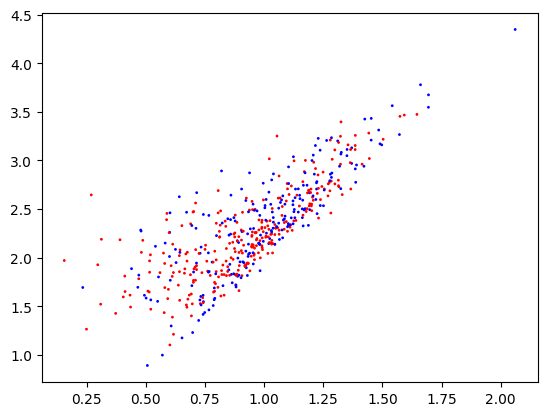

In [11]:
from keras.models import Model
from keras.layers import Input, Dense
import matplotlib.pyplot as plt

i = 'vital_status'
X = df.drop(columns=['file_id'] + list(pd.read_csv('data/clinical.tsv', sep='\t').columns)).apply(pd.to_numeric)
y = df['vital_status'].map({'Alive': True, 'Dead': False})
X = MinMaxScaler().fit_transform(X)

input_img = Input(shape=(50,))
encoded = Dense(25, activation='relu')(input_img)
encoded = Dense(10, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)
decoded = Dense(10, activation='relu')(encoded)
decoded = Dense(25, activation='relu')(decoded)
decoded = Dense(50, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
decoder = Model(encoded, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

history = autoencoder.fit(X, X,
                epochs=120,
                batch_size=256,
                shuffle=True,
                validation_split=0.2
)

encoded_imgs = encoder.predict(X)

plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y, cmap='bwr', s=1)
plt.show()

In this section, we build and train an autoencoder model using Keras. This model is designed for dimensionality reduction, which is especially useful in complex datasets. After defining the model architecture and compiling it, we train the model on our preprocessed dataset. The training process involves both encoding and decoding steps to learn a reduced representation of the data. We visualize the encoded data points to observe how well our model can differentiate between classes based on reduced dimensions.